 ## Week 3 Homework
<b><u>Important Note:</b></u> <p>You can load the data however you would like, but keep the files in .GZ Format. 
If you are using orchestration such as Airflow or Prefect do not load the data into Big Query using the orchestrator.</br> 
Stop with loading the files into a bucket.

Data can be found here: https://github.com/DataTalksClub/nyc-tlc-data/releases/tag/fhv </p>

In [1]:
## Create and activate a conda environment as shown in Week3_Readme.md
 
## In the GCP project: prefect-dezoomcamp(You can choose your GCPprojectname)
## Create a GCS Bucket: week3_data_warehouse

## Create and Configure prefect blocks GCP-Credentials and GCS-Bucket 
## Prefect GCS-Bucket Block Name: week3-data-warehouse

## Start prefect orion server: prefect orion start

In [2]:
# To load the data into the GCS bucket,
# Run week3_etl_to_gcs.py file with the command: python week3_etl_web_to_gcs.py in the activated environment terminal 
# or
# Run the file here by using !Python week3_etl_web_to_gcs.py

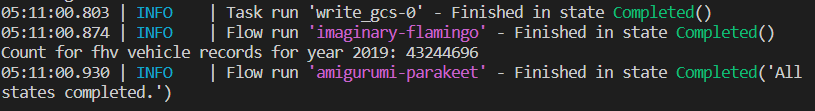

<u>NOTE:</u> You can use the CSV option for the GZ files when creating an External Table</br>

<b>SETUP:</b></br>
Create an external table using the fhv 2019 data. </br>
Create a table in BQ using the fhv 2019 data (do not partition or cluster this table). </br>
Data can be found here: https://github.com/DataTalksClub/nyc-tlc-data/releases/tag/fhv </p>

In [3]:
#  Open BigQuery and create a dataset named week3_data_warehouse and create an external table called external_fhv_tripdata
#  and run the following query in the BIGQUERY SQL Editor. This will create the external database. 

```
CREATE OR REPLACE EXTERNAL TABLE `prefect-dezoomcamp.week3_data_warehouse.external_fhv_tripdata` 
OPTIONS(
  format = "CSV",
  uris = ['gs://week3_data_warehouse/data\\fhv_tripdata_2019-*.csv.gz']
);
```

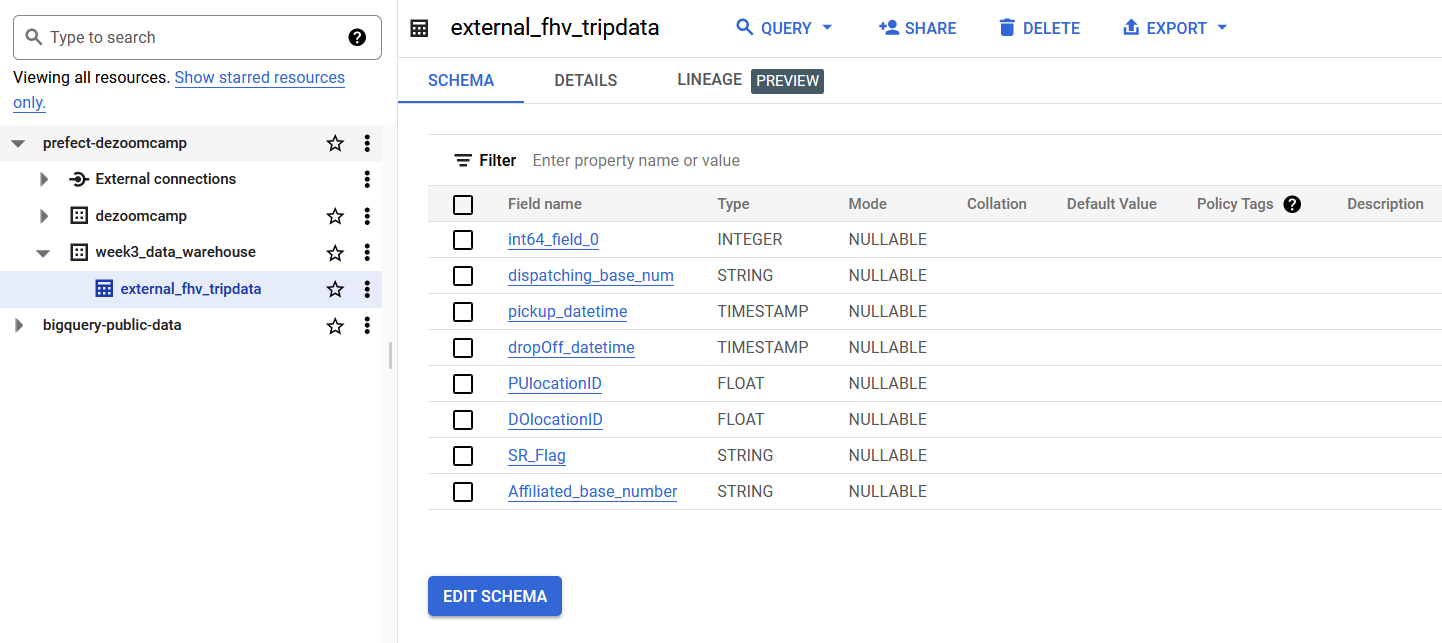

In [4]:
# To create a table in BQ using fhv 2019 data from external table

```
CREATE OR REPLACE TABLE prefect-dezoomcamp.week3_data_warehouse.fhv_tripdata AS
SELECT * FROM prefect-dezoomcamp.week3_data_warehouse.external_fhv_tripdata
```

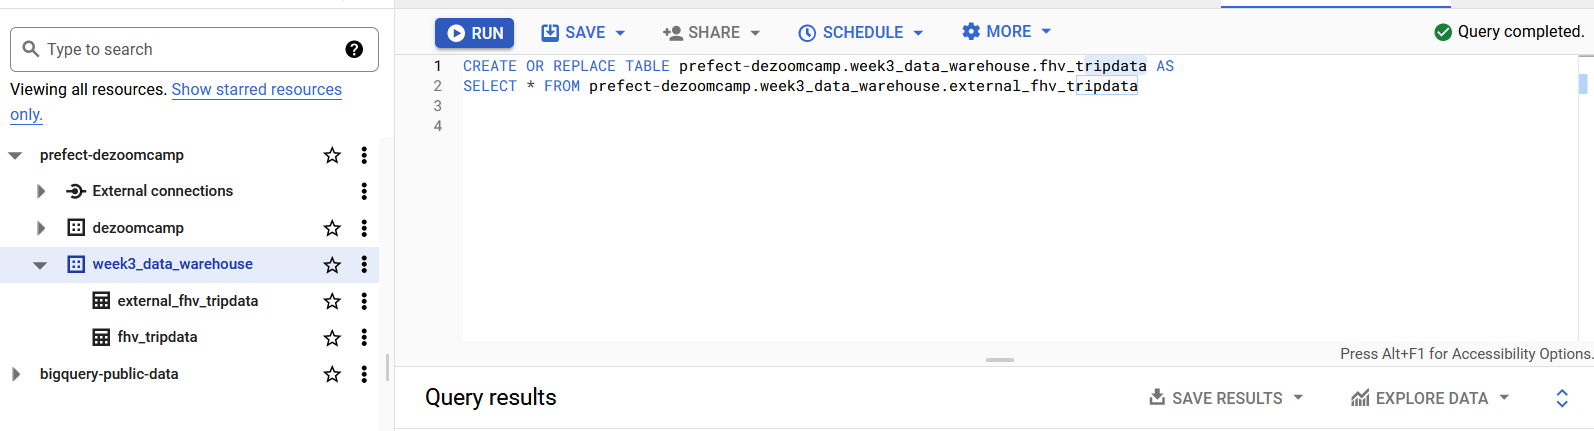

## Question 1:
What is the count for fhv vehicle records for year 2019?
- 65,623,481
- **43,244,696**
- 22,978,333
- 13,942,414

In [5]:
# Run the query in the BIGQUERY SQL Editor

```
SELECT COUNT(*) FROM `prefect-dezoomcamp.week3_data_warehouse.fhv_tripdata`
```

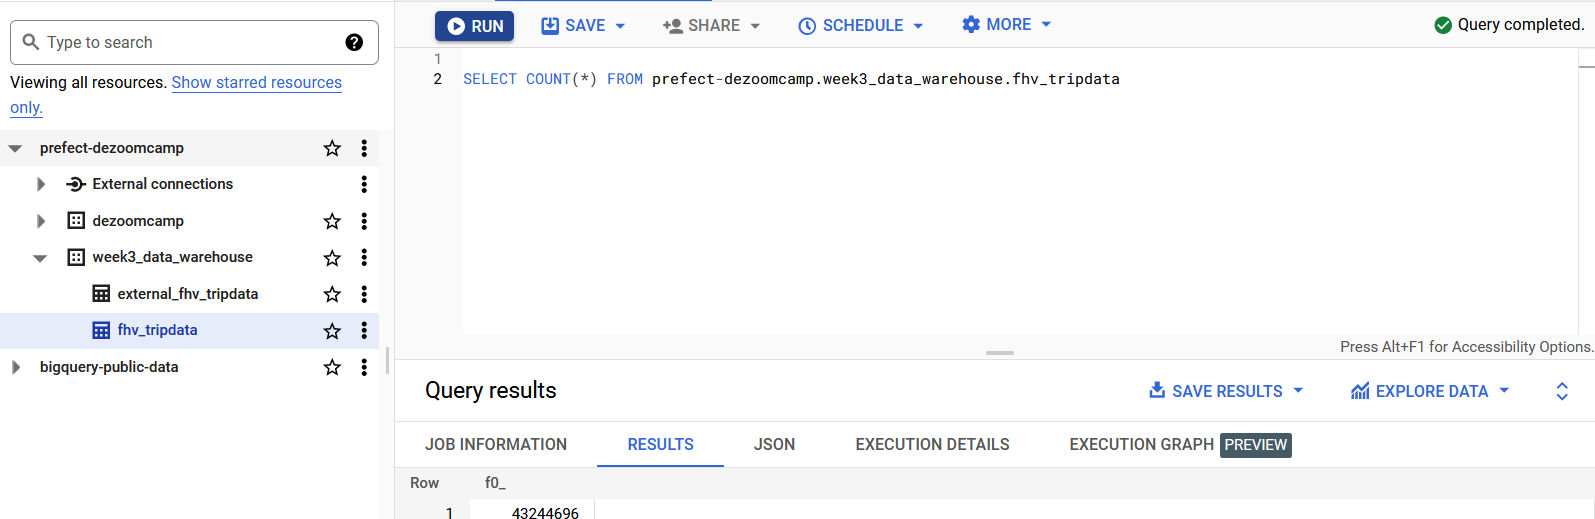

## Question 2:
Write a query to count the distinct number of affiliated_base_number for the entire dataset on both the tables.</br> 
What is the estimated amount of data that will be read when this query is executed on the External Table and the Table?

- 25.2 MB for the External Table and 100.87MB for the BQ Table
- 225.82 MB for the External Table and 47.60MB for the BQ Table
- 0 MB for the External Table and 0MB for the BQ Table
- **0 MB for the External Table and 317.94MB for the BQ Table** 

In [6]:
# Run both the queries in the BIGQUERY SQL Editor

```
SELECT COUNT(DISTINCT Affiliated_base_number) FROM `week3_data_warehouse.external_fhv_tripdata`;
```

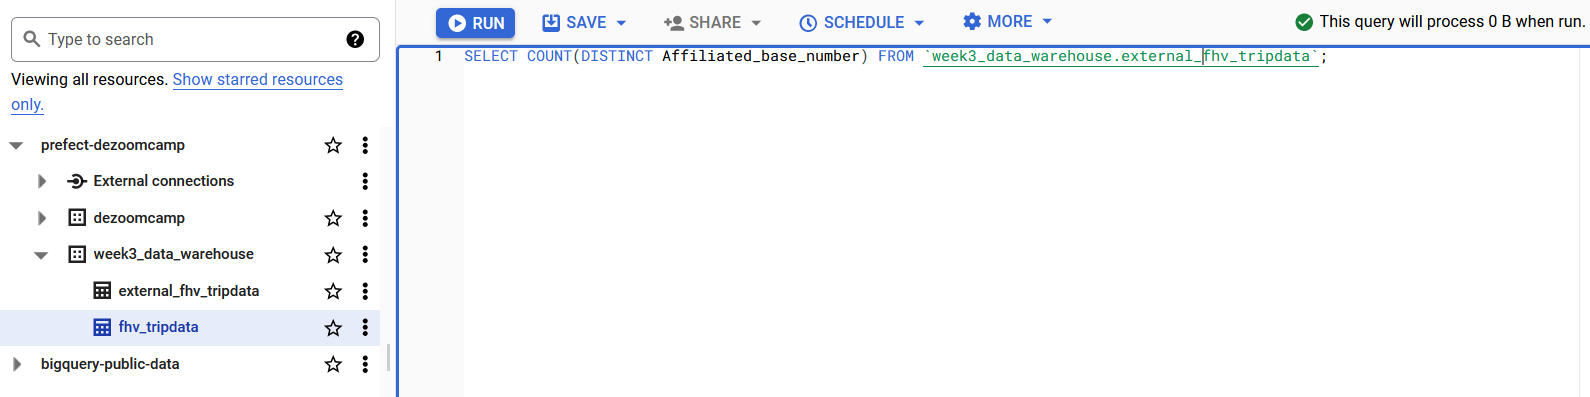

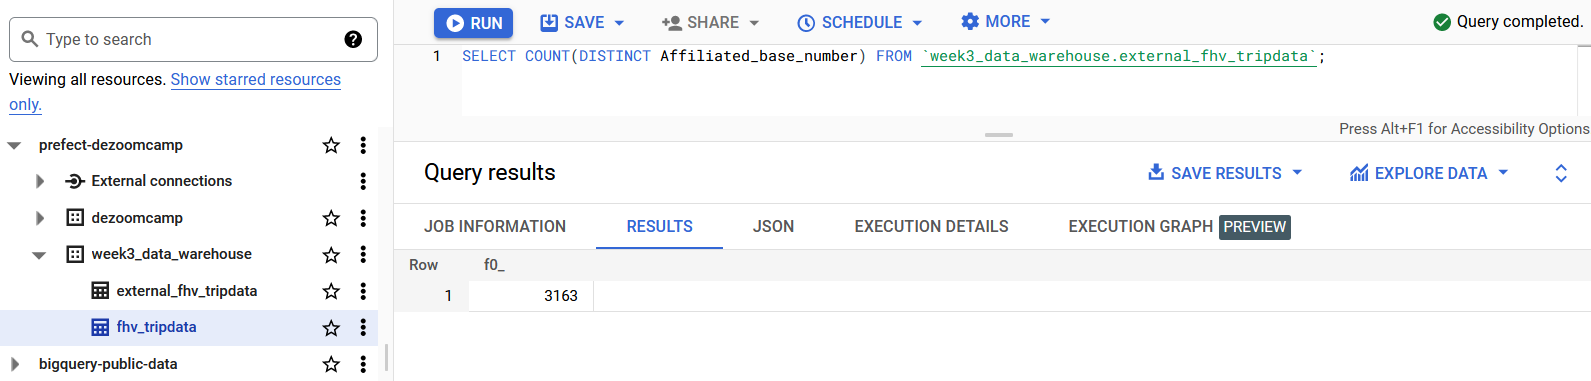

```
SELECT COUNT(DISTINCT Affiliated_base_number) FROM `week3_data_warehouse.fhv_tripdata`;
```

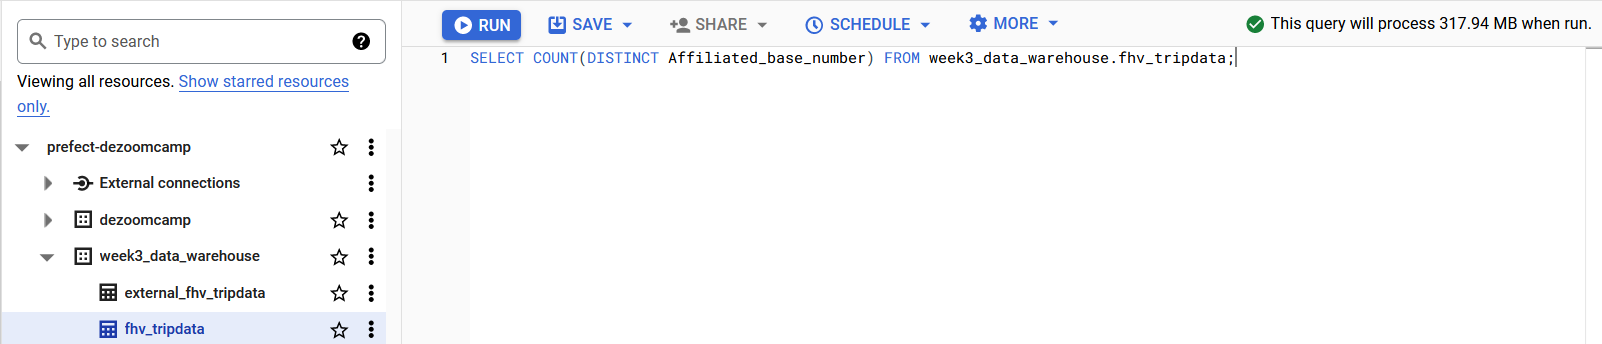

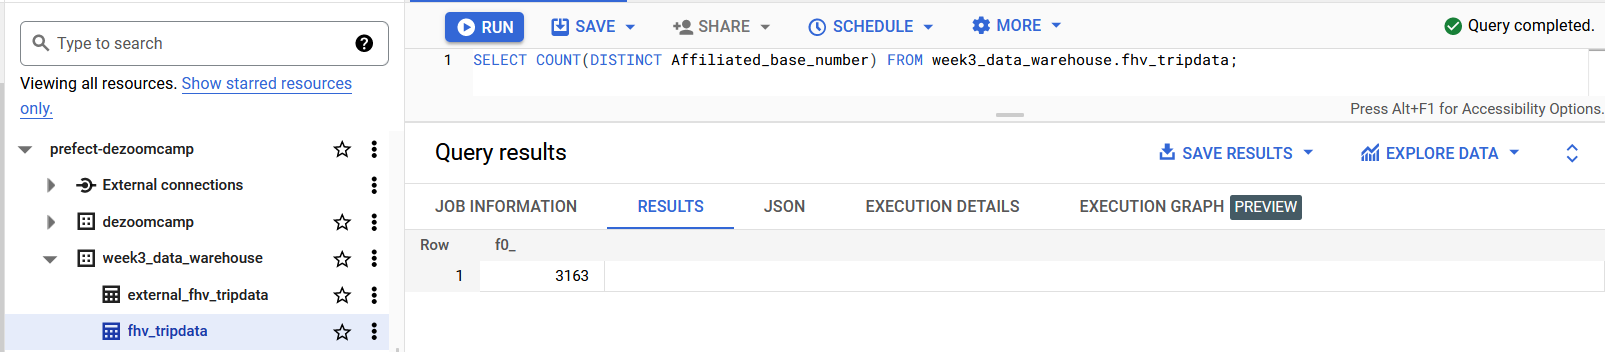

## Question 3:
How many records have both a blank (null) PUlocationID and DOlocationID in the entire dataset?
- **717,748**
- 1,215,687
- 5
- 20,332

In [7]:
# Run the query in the BIGQUERY SQL Editor

```
SELECT COUNT(*) FROM `week3_data_warehouse.fhv_tripdata` WHERE PUlocationID IS NULL AND DOlocationID IS NULL;
```

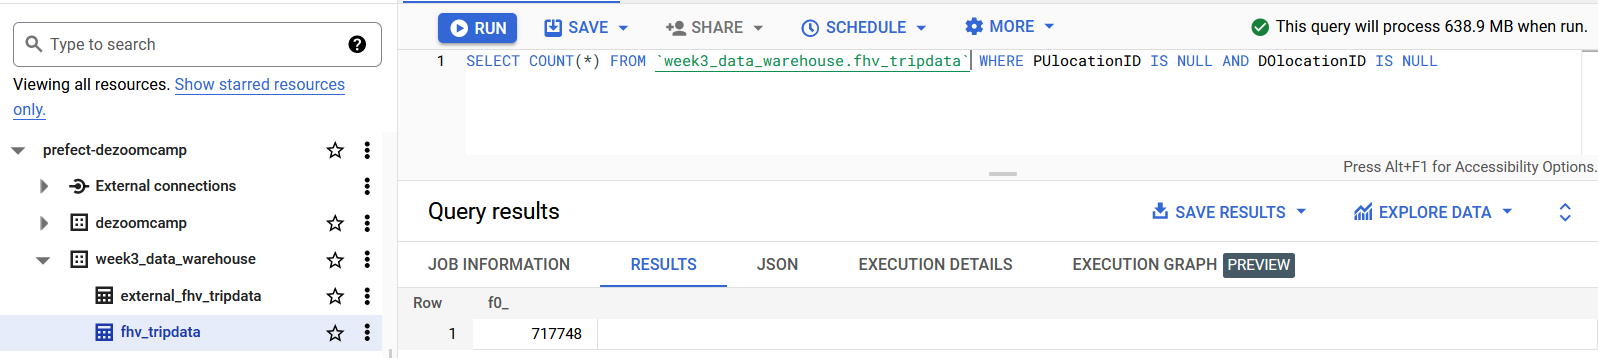

## Question 4:
What is the best strategy to optimize the table if query always filter by pickup_datetime and order by affiliated_base_number?
- Cluster on pickup_datetime Cluster on affiliated_base_number
- **Partition by pickup_datetime Cluster on affiliated_base_number**
- Partition by pickup_datetime Partition by affiliated_base_number
- Partition by affiliated_base_number Cluster on pickup_datetime

## Question 5:
Implement the optimized solution you chose for question 4. Write a query to retrieve the distinct affiliated_base_number between pickup_datetime 2019/03/01 and 2019/03/31 (inclusive).</br> 
Use the BQ table you created earlier in your from clause and note the estimated bytes. Now change the table in the from clause to the partitioned table you created for question 4 and note the estimated bytes processed. What are these values? Choose the answer which most closely matches.
- 12.82 MB for non-partitioned table and 647.87 MB for the partitioned table
- **647.87 MB for non-partitioned table and 23.06 MB for the partitioned table**
- 582.63 MB for non-partitioned table and 0 MB for the partitioned table
- 646.25 MB for non-partitioned table and 646.25 MB for the partitioned table

In [8]:
# Run the query in the BIGQUERY SQL Editor to create a partitioned and clustered table

```
CREATE OR REPLACE TABLE `week3_data_warehouse.fhv_tripdata_partitoned_clustered`
PARTITION BY DATE(pickup_datetime)
CLUSTER BY Affiliated_base_number AS
SELECT * FROM `week3_data_warehouse.fhv_tripdata`;
```

In [9]:
# For Non Partitioned Table, Run the query in the BIGQUERY SQL Editor

```
SELECT
  DISTINCT AFFILIATED_BASE_NUMBER
FROM
  `week3_data_warehouse.fhv_tripdata`
WHERE
  DATE(pickup_datetime) BETWEEN DATE('2019-03-01')
  AND DATE('2019-03-31')
```

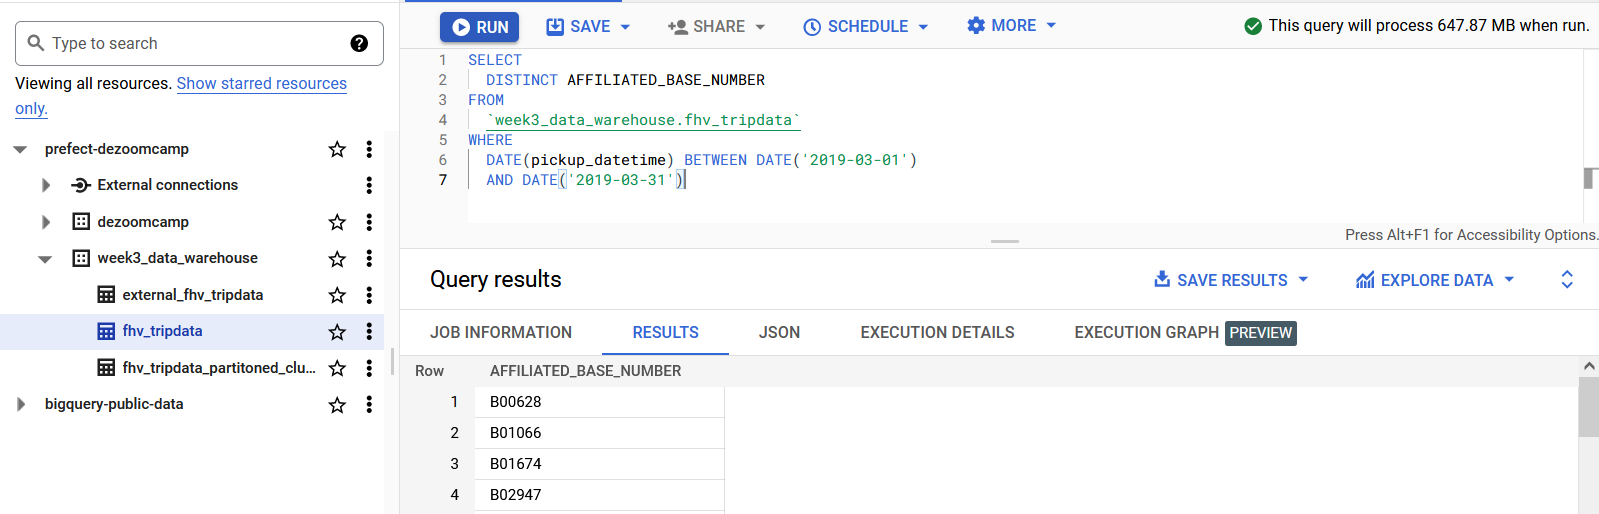

In [10]:
# For Partitioned and Clustered Table, Run the query in the BIGQUERY SQL Editor

```
SELECT
  DISTINCT AFFILIATED_BASE_NUMBER
FROM
  `week3_data_warehouse.fhv_tripdata_partitoned_clustered`
WHERE
  DATE(pickup_datetime) BETWEEN DATE('2019-03-01')
  AND DATE('2019-03-31')
```

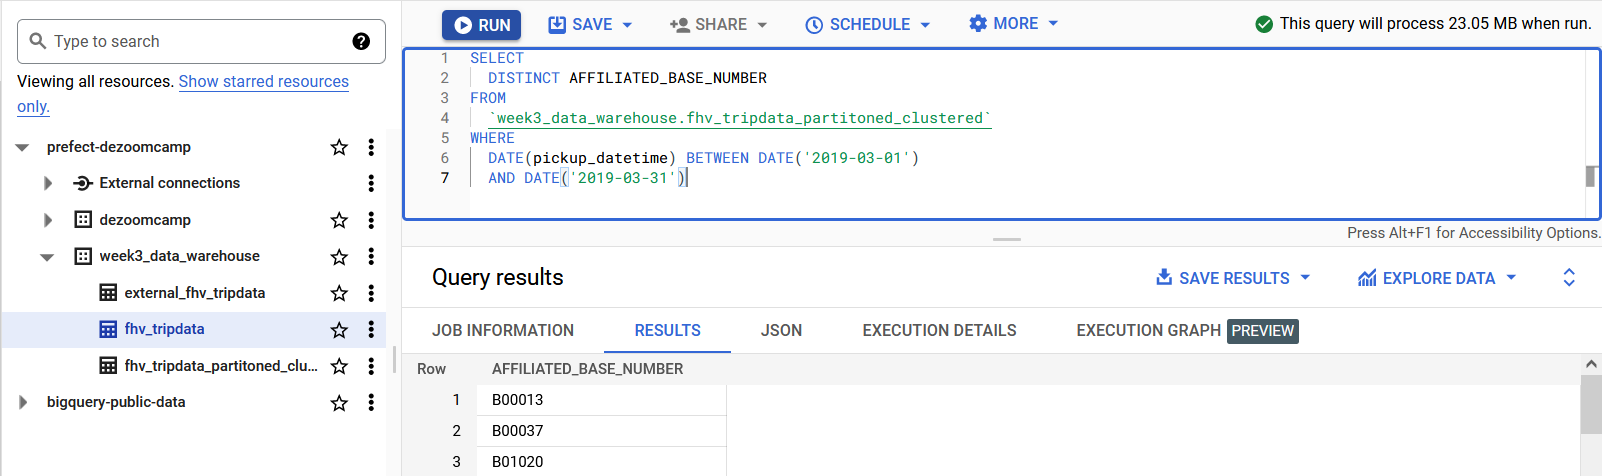

## Question 6: 
Where is the data stored in the External Table you created?

- Big Query
- **GCP Bucket**
- Container Registry
- Big Table

## Question 7:
It is best practice in Big Query to always cluster your data:
- **True**
- False

## (Not required) Question 8:
A better format to store these files may be parquet. Create a data pipeline to download the gzip files and convert them into parquet. Upload the files to your GCP Bucket and create an External and BQ Table. 


Note: Column types for all files used in an External Table must have the same datatype. While an External Table may be created and shown in the side panel in Big Query, this will need to be validated by running a count query on the External Table to check if any errors occur. 
 

In [11]:
# To load the parquet data into the GCS bucket,
# Run week3_etl_to_gcs_parquet.py file with the command: python week3_etl_to_gcs_parquet.py in the activated environment terminal 
# or
# Run the file here by using !Python week3_etl_to_gcs_parquet.py

In [12]:
#  Open BigQuery and create an external table called external_fhv_tripdata_parquet in week3_data_warehouse dataset
#  and run the following query in the BIGQUERY SQL Editor. This will create the external database. 

```
CREATE OR REPLACE EXTERNAL TABLE `prefect-dezoomcamp.week3_data_warehouse.external_fhv_tripdata_parquet` 
OPTIONS(
  format = "PARQUET",
  uris = ['gs://week3_data_warehouse/data_parquet\\fhv_tripdata_2019-*.parquet']
);
```

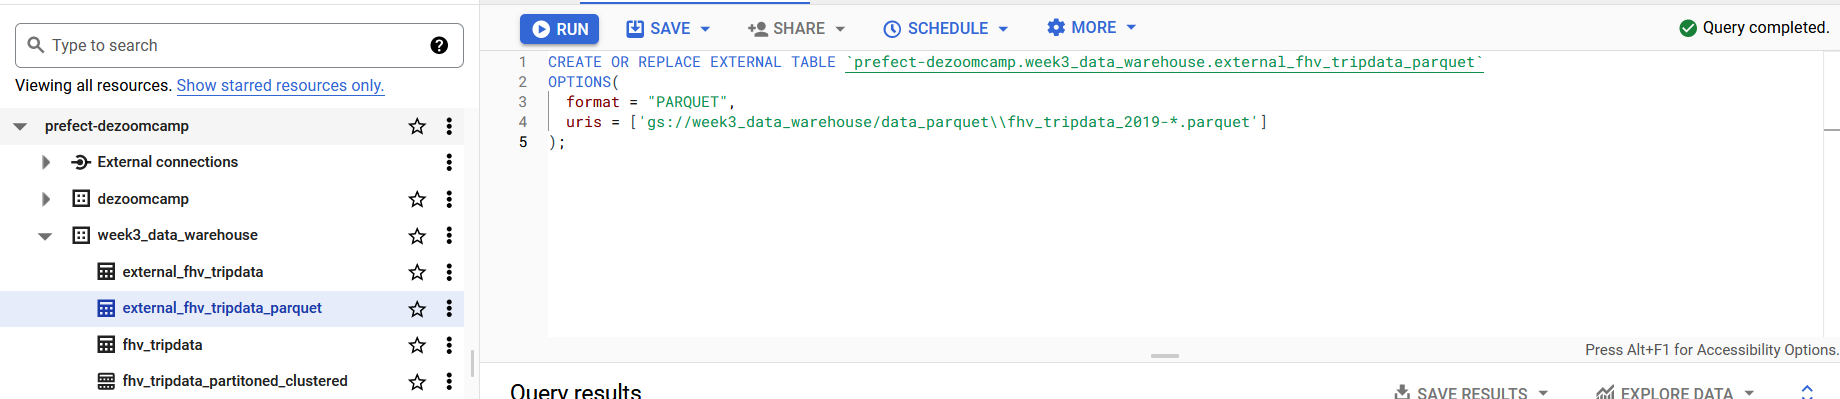

In [13]:
# Validate by running the below count query on the External Table in Big Query SQL Editor:

```
SELECT COUNT(*) FROM `week3_data_warehouse.external_fhv_tripdata_parquet`
```

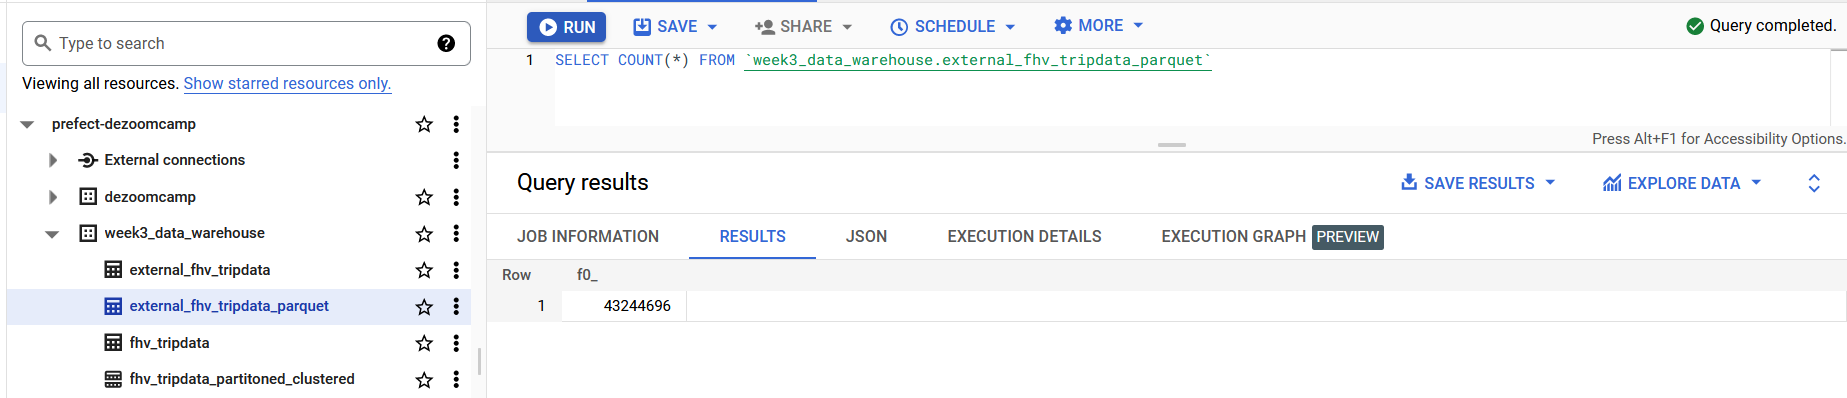

In [14]:
# To create a table in BQ using fhv 2019 parquet data from external table

```
CREATE OR REPLACE TABLE prefect-dezoomcamp.week3_data_warehouse.fhv_tripdata_parquet AS
SELECT * FROM prefect-dezoomcamp.week3_data_warehouse.external_fhv_tripdata_parquet
```

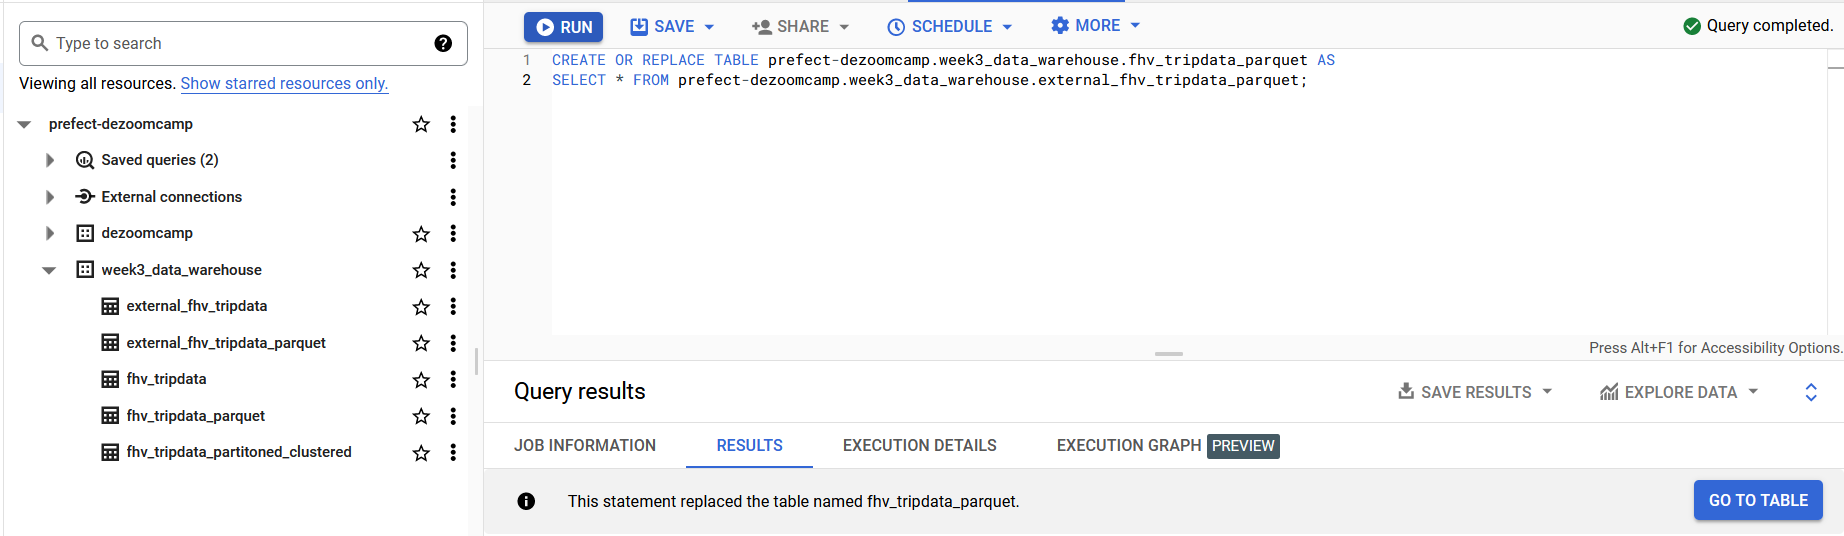

## Submitting the solutions

* Form for submitting: https://forms.gle/rLdvQW2igsAT73HTA
* You can submit your homework multiple times. In this case, only the last submission will be used. 

Deadline: 13 February (Monday), 22:00 CET
